# Taller 2: multiplicación de matrices

Cree un notebook de python donde implemente los siguientes algoritmos para el problema de multiplicación de matrices cuadradas de tamaño nxn A*B = C:

1.Implemente un algoritmo de multiplicación de matrices en tiempo O(n^3) que calcule cada elemento de la matriz C como 
c_{ij} = \sum_{k=1}^n a_{ik}*b_{kj}

In [5]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
%matplotlib inline
import matplotlib.pyplot as pl
%matplotlib inline

In [6]:
filas=10
columnas=10
mat = np.random.randint(2,100,(filas,columnas))
matriz2 = np.random.randint(2,100,(filas,columnas))
print mat

[[ 6 13 12 99 27 94 49  7 80 94]
 [84 41 37 26 92 74 28 17 20  9]
 [62 25 77 93 70 55 35 73 91 49]
 [66 66 25 81 94 74 96 56 77  8]
 [34 74 19 51 18 83 39 68 16 63]
 [93 95  5 76 61 32 74 94 18 73]
 [75 88 16 62 71 95 46 43 98 72]
 [20 32 97 81 96 63 36 92  4 47]
 [22 27  2 33 48 83  6 84 65 70]
 [69 87 91 97 73 72 82 50 67 85]]


In [7]:
def multiplicacionMatrices(matriz1,matriz2, tam):
    
    matriz3 = np.zeros((tam,tam))
    
    for i in range(tam):
        for j in range(tam):
            for k in range(tam):
                
                matriz3[i][j] = matriz3[i][j] + (matriz1[i][k]*matriz2[k][j])
    
    return matriz3

In [8]:
tam = 5
matriz1 = np.random.randint(0,25,(tam,tam))
matriz2 = np.random.randint(0,25,(tam,tam))
multiplicacionMatrices(matriz1,matriz2,tam)

array([[  948.,   530.,   565.,   762.,   693.],
       [ 1383.,   612.,   828.,  1051.,  1110.],
       [ 1188.,   612.,   792.,   900.,  1056.],
       [ 1870.,  1057.,  1116.,  1212.,  1432.],
       [ 1881.,  1118.,  1114.,  1217.,  1398.]])

In [9]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def contador_multiplicacionMatrices(matriz1,matriz2,tam,acct):
    
    #inicializo la matriz en ceros - vacia
    matriz3 = np.zeros((tam,tam))
    acct.count()
    
    for i in range(tam):
        acct.count()
        for j in range(tam):
            acct.count()
            for k in range(tam):
                acct.count()
                matriz3[i][j] = matriz3[i][j] + (matriz1[i][k]*matriz2[k][j]);acct.count()
    
    return matriz3

In [14]:
tam = 100
matriz1 = np.random.randint(0,25,(tam,tam))
matriz2 = np.random.randint(0,25,(tam,tam))
acct = Counter()
contador_multiplicacionMatrices(matriz1,matriz2,tam,acct)
acct.print_steps()

Number of steps = 2010101


In [15]:
import random as rnd

def exper_analysis(n):
    
    results = []
    acct = Counter()
    tam=1
    
    for tam in range(2,n):
        
        acct.reset()
        matriz1=np.random.randint(0, 50, (tam, tam))
        matriz2=np.random.randint(0, 50, (tam, tam))
        contador_multiplicacionMatrices(matriz1, matriz2,tam,acct)
        results.append(acct.steps)
        
    return results

In [16]:
print (exper_analysis(50))

[23, 67, 149, 281, 475, 743, 1097, 1549, 2111, 2795, 3613, 4577, 5699, 6991, 8465, 10133, 12007, 14099, 16421, 18985, 21803, 24887, 28249, 31901, 35855, 40123, 44717, 49649, 54931, 60575, 66593, 72997, 79799, 87011, 94645, 102713, 111227, 120199, 129641, 139565, 149983, 160907, 172349, 184321, 196835, 209903, 223537, 237749]


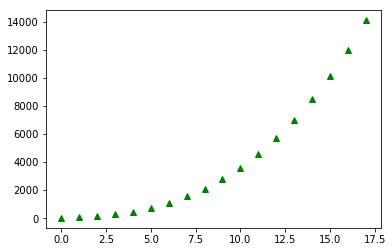

In [17]:
pl.clf()
x = np.arange(18)
y = np.array(exper_analysis(20))
pl.plot(x, y, 'g^')

2.Implemente un algoritmo de multiplicación de matrices basado en una estrategía de multiplicación de matrices en tiempo O(n^3) donde cada matriz es dividida en 4 partes iguales.

In [18]:
def sumaMatrices(A, B):
    
    assert len(A) == len(B)
    assert len(A[0]) == len(B[0])
    C = np.zeros((len(A), len(A[0])))
    
    for i in range(len(A)):
        for j in range(len(A[0])):
            C[i][j] = A[i][j] + B[i][j]
            
    return C

In [19]:
def dividirMatriz(A, B):
    
    assert len(A) == len(A[0])
    assert len(B) == len(B[0])
    assert len(A) == len(B)
    
    if len(A) % 2 == 0 and len(A[0]) % 2 == 0 and len(A) > 2:
        
        #Se definen variables de inicio y final para poder hacer las divisiones 
        #en A y B indicadas en el grafico del enunciado 
        inicio = len(A)/2
        final = len(A)
        
        # Se extraen las submatrices para A indicadas en el enunciado:
        a = A[0:inicio, 0:inicio]
        b = A[0:inicio, inicio:final]
        c = A[inicio:final, 0:inicio]
        d = A[inicio:final, inicio:final]
        
        # Se extraen las submatrices para B indicadas en el enunciado:
        e = B[0:inicio, 0:inicio]
        f = B[0:inicio, mid:final]
        g = B[inicio:final, 0:inicio]
        h = B[inicio:final, inicio:final]
        
        # Se multiplican las submatrices obtenidas previamente. 
        #Este paso es necesario para poder obtener posteriormente la matriz C.
        a_x_e = dividirMatriz(a,e)
        b_x_g = dividirMatriz(b,g)
        a_x_f = dividirMatriz(a,f)
        b_x_h = dividirMatriz(b,h)
        c_x_e = dividirMatriz(c,e)
        d_x_g = dividirMatriz(d,g)
        c_x_f = dividirMatriz(c,f)
        d_x_h = dividirMatriz(d,h)
        
        # Se suman las matrices que fueron multiplicadas anteriormente
        SuperiorIzq = sumaMatrices(a_x_e,b_x_g)
        SuperiorDer = sumaMatrices(a_x_f,b_x_h)
        InferiorIzq = sumaMatrices(c_x_e,d_x_g)
        InferiorDer = sumaMatrices(c_x_f,d_x_h)
        
        # Se genera la matríz final
        ParteSuperior = np.c_[SuperiorIzq,SuperiorDer]
        ParteInferior = np.c_[InferiorIzq,InferiorDer]
        Completa = np.r_[ParteSuperior, ParteInferior]
        
        return Completa
    else:
        return multiplicacionMatrices(A,B, tam)

In [20]:
tam=5
A = np.random.randint(10, size = (5,5))
B = np.random.randint(10, size = (5,5))
print A
print ""
print B
print ""
MatFinal = dividirMatriz(A,B)

print MatFinal


[[7 3 7 5 7]
 [8 0 2 3 8]
 [1 2 5 6 1]
 [1 8 7 7 3]
 [9 6 3 0 7]]

[[5 9 3 9 1]
 [0 4 7 1 7]
 [2 5 0 6 2]
 [7 3 1 1 9]
 [5 4 1 2 5]]

[[ 119.  153.   54.  127.  122.]
 [ 105.  123.   35.  103.   79.]
 [  62.   64.   24.   49.   84.]
 [  83.  109.   69.   72.  149.]
 [  86.  148.   76.  119.   92.]]


In [21]:
def count_sumaMatrices(A, B):
    
    assert len(A) == len(B);acct.count()
    assert len(A[0]) == len(B[0]);acct.count()
    C = np.zeros((len(A), len(A[0])));acct.count()
    
    for i in range(len(A)):
        acct.count()
        for j in range(len(A[0])):
            acct.count()
            C[i][j] = A[i][j] + B[i][j];acct.count()
            
    return C

3.Implemente el algoritmo de strassen

In [22]:
def restaMatrices(A, B):
    
    assert len(A) == len(B)
    assert len(A[0]) == len(B[0])
    C = np.zeros((len(A), len(A[0])))
    
    for i in range(len(A)):
        for j in range(len(A[0])):
            C[i][j] = A[i][j] - B[i][j]
            
    return C

In [25]:
def algoritmoStrassen(matriz1, matriz2):
    
    if(len(matriz1)==5):
        return multiplicacionMatrices(matriz1, matriz2, 5)
    
    else:
        tam= len(matriz1)
        
        if(tam%2 != 0):
            x = np.zeros((tam,1))
            y = np.zeros((1,(tam + 1)))
            
            matriz3 = np.x_[matriz1,x]
            matriz3 = np.y_[matriz3,y]
            matriz4 = np.x_[matriz2,x]
            matriz4 = np.y_[matriz4,y]
            
            tam = len(matriz3)
            
            inicial=1
        
        else:
            tam= len(matriz1)
            
            matriz3=matriz1
            matriz4=matriz2
            
            inicial=0
   
        #Se definen variables de inicio y final para poder hacer las divisiones 
        #en A y B indicadas en el grafico del enunciado 
        inicio = len(A)/2
        final = len(A)
        
        # Se extraen las submatrices para A indicadas en el enunciado:
        a = A[0:inicio, 0:inicio]
        b = A[0:inicio, inicio:final]
        c = A[inicio:final, 0:inicio]
        d = A[inicio:final, inicio:final]
        
        # Se extraen las submatrices para B indicadas en el enunciado:
        e = B[0:inicio, 0:inicio]
        f = B[0:inicio, mid:final]
        g = B[inicio:final, 0:inicio]
        h = B[inicio:final, inicio:final]
        
        AFinal=np.zeros((inicio,inicio))
        BFinal=np.zeros((inicio,inicio))

        AFinal=sumaMatrices(a,d)
        BFinal=sumaMatrices(e,h)
        
        mat1=algoritmoStrassen(AFinal,BFinal)
    
        AFinal = sumaMatrices(c,d)      
        mat2 = algoritmoStrassen(AFinal,e)
        
        BFinal = restaMatrices(f,h) 
        mat3 = algoritmoStrassen(a,BFinal)  
        
        BFinal = restaMatrices(g,e)
        mat4 =algoritmoalgoritmoStrassen(d,BFinal)   
        
        AFinal = sumaMatrices(a,b)      
        mat5 = algoritmoStrassen(AFinal,h)    

        AFinal = restaMatrices(c,a) 
        BFinal = sumaMatrices(e,f)      
        mat6 = algoritmoStrassen(AFinal,BFinal)

        AFinal = restaMatrices(b,d) 
        BFinal = sumaMatrices(g,h)      
        mat7 = algoritmoStrassen(AFinal,BFinal) 
                
        l = sumaMatrices(mat3, mat5) 
        m = sumaMatrices(mat2, mat4)  

        AFinal= sumaMatrices(mat1, mat4) 
        BFinal = sumaMatrices(AFinal, mat7) 
        k = restaMatrices(BFinal, mat5) 

        aResult = sumaMatrices(mat1, mat3) 
        BFinal = sumaMatrices(AFinal, mat6) 
        n = restaMatrices(BFinal, mat2) 
        
        k=np.c_[k,l]
        m=np.c_[m,n]
        k=np.r_[k,m]
              
        if inicial==1:
            tm=len(k)
            k=k[:tm-1,:tm-1]

        return k
    

In [24]:
print ("Digite el tamaño de la matriz");
tam= int(input());

matriz1=np.random.randint(0, 100, (tam, tam))
matriz2=np.random.randint(0, 100, (tam, tam))

print "Matriz1:  \n",matriz1 
print "Matriz2:  \n",matriz2

print"Matriz final aplicando el algoritmo de Strassen:\n",algoritmoStrassen(matriz1, matriz2)

Digite el tamaño de la matriz
5
Matriz1:  
[[98 34 96 52 57]
 [22 24 51 82 13]
 [81 25 66 50 45]
 [35 37 35 83 71]
 [61 92 71 88 19]]
Matriz2:  
[[56  1 68 67 85]
 [73 69 22 84 96]
 [38 22 16 60 49]
 [71 84 53 33 93]
 [84 95 35 29 43]]
Matriz final aplicando el algoritmo de Strassen:
[[ 20098.  14339.  13699.  18551.  23585.]
 [ 11836.  10923.   7641.   9633.  14858.]
 [ 16199.  11733.  11339.  14442.  19104.]
 [ 17848.  17075.  10638.  12351.  19014.]
 [ 20674.  17168.  12637.  19530.  26497.]]
